# ***Linear Regression with NN - PyTorch***

## *Creating a sample dataset for the experiment*

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

torch.__version__

'2.1.0+cu121'

In [2]:
weight, bias = 0.7, 0.3 # weights and bias to create the sample dataset

# Create data
step = 0.02
X = torch.arange(0, 2, 0.02).unsqueeze(dim=1)
y = weight * X + bias

X = X + (torch.randn_like(X) * 0.02) # adding a randow noise to the data
y = y + (torch.randn_like(y) * 0.02)

print("X of dataset:\n", X[:5], X.shape)
print("Y of dataset:\n", y[:5], y.shape)

X of dataset:
 tensor([[-0.0142],
        [ 0.0182],
        [ 0.0440],
        [ 0.0820],
        [ 0.0642]]) torch.Size([100, 1])
Y of dataset:
 tensor([[0.2963],
        [0.3259],
        [0.3422],
        [0.3427],
        [0.3357]]) torch.Size([100, 1])


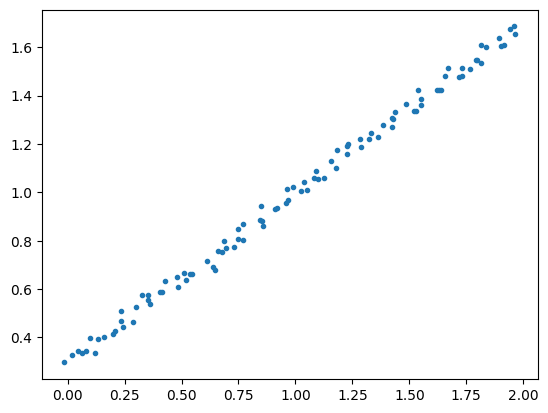

In [3]:
plt.scatter(X, y, marker='.')  # 'o' for markers
plt.show()

## *Spliting the dataset into train and test with a ration*

In [4]:
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

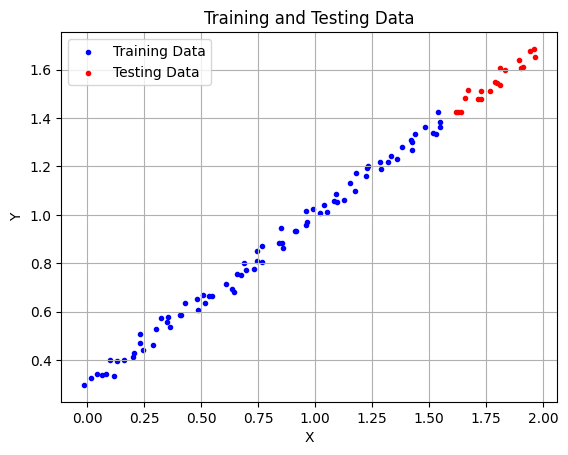

In [5]:
plt.scatter(X_train, y_train, color='blue', label='Training Data', marker=".")
plt.scatter(X_test, y_test, color='red', label='Testing Data', marker=".")
plt.title('Training and Testing Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

## *Define the neural netwrok*

**torch.nn.Module** is designed to be subclassed to define custom neural network architectures. When you define a new neural network module in PyTorch, you typically inherit from **torch.nn.Module**.

We set `requires_grad=True` because we want to compute gradients of the weights and bias during the training process, which is essential for running the gradient descent algorithm.

* `nn.Module` contains the larger building blocks (layers)
* `nn.Parameter` contains the smaller parameters like weights and biases (put these together to make `nn.Module`(s))
* `forward()` tells the larger blocks how to make calculations on inputs (tensors full of data) within  `nn.Module`(s)
* `torch.optim` contains optimization methods on how to improve the parameters within `nn.Parameter` to better represent input data

In [6]:
class LinearRegressionModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = torch.nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
        self.bias = torch.nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

* `torch.nn` : Contains all of the building blocks for computational graphs
* `torch.nn.Module` : The base class of the all the NN, all the building blocks for NN are contains here. If we want to NN, then we should subclass `nn.Module`.
* This contains various kind of optimization algorithms.


## *Create an instance of the model*

In [7]:
model_linear = LinearRegressionModel()

In [8]:
print(list(model_linear.parameters()), "\n")
print(model_linear.state_dict(), "\n")
print(model_linear.weights, "\n")

[Parameter containing:
tensor([-0.4729], requires_grad=True), Parameter containing:
tensor([1.2004], requires_grad=True)] 

OrderedDict([('weights', tensor([-0.4729])), ('bias', tensor([1.2004]))]) 

Parameter containing:
tensor([-0.4729], requires_grad=True) 



## *Making predictions with the model before the training process*

In [9]:
with torch.inference_mode(): # inference_mode, tured off the gradient traking
    y_preds = model_linear(X_test)
y_preds.T

tensor([[0.4338, 0.4252, 0.4300, 0.4163, 0.3881, 0.4100, 0.3822, 0.3820, 0.3651,
         0.3504, 0.3534, 0.3432, 0.3432, 0.3324, 0.3002, 0.2955, 0.3043, 0.2814,
         0.2733, 0.2711]])

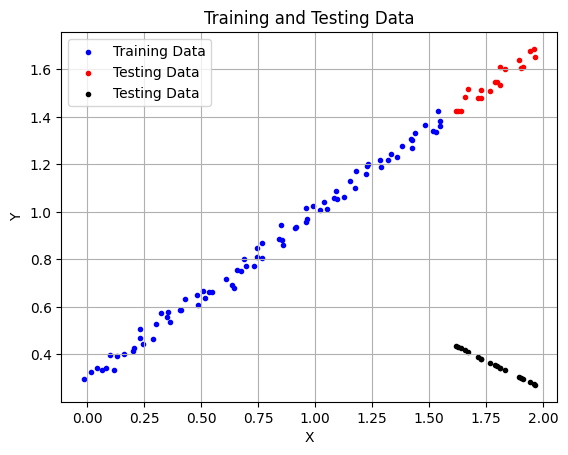

In [10]:
plt.scatter(X_train, y_train, color='blue', label='Training Data', marker=".")
plt.scatter(X_test, y_test, color='red', label='Testing Data', marker=".")
plt.scatter(X_test, y_preds, color='black', label='Testing Data', marker=".")
plt.title('Training and Testing Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

## *Fit the model to the training dataset - Training the model*

***Define the error function - MSE (Mean square Error) & Optimizer***

In [11]:
loss_func = torch.nn.MSELoss() # Meas Square Error Loss function
optimizer = torch.optim.SGD(model_linear.parameters(), lr=0.01) # stochastic gradient descent (SGD) optimization algorithm

#In stochastic gradient descent, only one training example is used to compute the gradient of the loss function with respect to the model parameters in each iteration.

***Training loop of the model***

In [12]:
epochs = 3000 # number of times, the model will pass over the training data

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    model_linear.train()

    y_pred = model_linear(X_train) # forward propagation
    loss = loss_func(y_pred, y_train) # loss calculations
    optimizer.zero_grad() # gradient resets to zero in each epoch
    loss.backward() # backward propagation (move backward through the network to calculate the gradient of each parameters with respect to the loss)
    optimizer.step() # update paramterrs to reduce the loss

    model_linear.eval()
    with torch.no_grad():
        test_pred = model_linear(X_test)
        test_loss = loss_func(test_pred, y_test.type(torch.float))

        if epoch % 100 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")


Epoch: 0 | MAE Train Loss: 0.294051855802536 | MAE Test Loss: 1.4196586608886719 
Epoch: 100 | MAE Train Loss: 0.16578730940818787 | MAE Test Loss: 0.5884791612625122 
Epoch: 200 | MAE Train Loss: 0.10141901671886444 | MAE Test Loss: 0.3513709008693695 
Epoch: 300 | MAE Train Loss: 0.0621519461274147 | MAE Test Loss: 0.21292002499103546 
Epoch: 400 | MAE Train Loss: 0.03818956017494202 | MAE Test Loss: 0.12891936302185059 
Epoch: 500 | MAE Train Loss: 0.02356671169400215 | MAE Test Loss: 0.07793502509593964 
Epoch: 600 | MAE Train Loss: 0.014643232338130474 | MAE Test Loss: 0.047035686671733856 
Epoch: 700 | MAE Train Loss: 0.009197740815579891 | MAE Test Loss: 0.028346244245767593 
Epoch: 800 | MAE Train Loss: 0.005874683149158955 | MAE Test Loss: 0.017071446403861046 
Epoch: 900 | MAE Train Loss: 0.0038468134589493275 | MAE Test Loss: 0.01029280386865139 
Epoch: 1000 | MAE Train Loss: 0.002609322313219309 | MAE Test Loss: 0.006235611625015736 
Epoch: 1100 | MAE Train Loss: 0.00185415

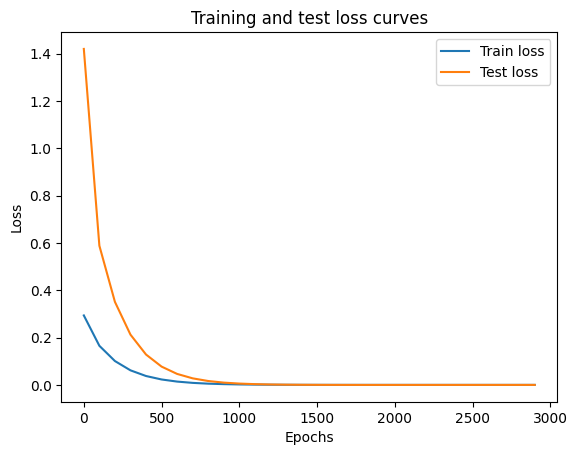

In [13]:
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

***Make predictions with the trained model***

In [14]:
with torch.inference_mode(): # inference_mode, tured off the gradient traking
    y_preds = model_linear(X_test)
y_preds.T

tensor([[1.4368, 1.4496, 1.4424, 1.4629, 1.5049, 1.4722, 1.5137, 1.5139, 1.5390,
         1.5610, 1.5565, 1.5716, 1.5717, 1.5877, 1.6357, 1.6427, 1.6296, 1.6636,
         1.6758, 1.6791]])

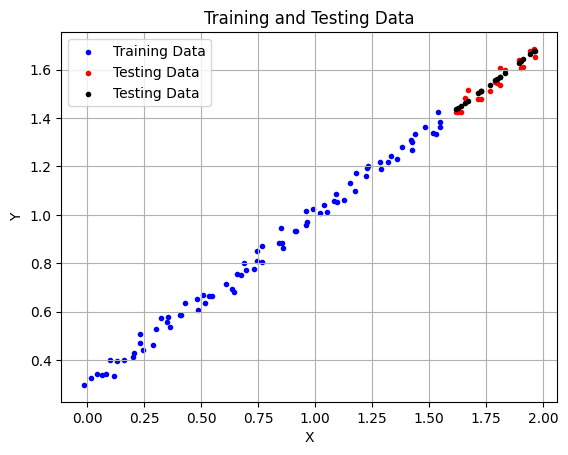

In [15]:
plt.scatter(X_train, y_train, color='blue', label='Training Data', marker=".")
plt.scatter(X_test, y_test, color='red', label='Testing Data', marker=".")
plt.scatter(X_test, y_preds, color='black', label='Testing Data', marker=".")
plt.title('Training and Testing Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

***Weights and bias of the model after the training process***

In [16]:
print(list(model_linear.parameters()), "\n")
print(model_linear.state_dict(), "\n")
print(model_linear.weights, "\n")

[Parameter containing:
tensor([0.7041], requires_grad=True), Parameter containing:
tensor([0.2954], requires_grad=True)] 

OrderedDict([('weights', tensor([0.7041])), ('bias', tensor([0.2954]))]) 

Parameter containing:
tensor([0.7041], requires_grad=True) 



## **Rebuild using PyTorch `nn.Linear()` function**
In this way, we do not have to define each paramters(weights and bias) seperatly.


***Define the model***

In [17]:
class LinearRegressionModel_V2(torch.nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters
        self.linear_layer = torch.nn.Linear(in_features=1,
                                      out_features=1)

    # Define the forward computation (input data x flows through nn.Linear())
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

In [18]:
model_linear_v2 = LinearRegressionModel_V2()

***Define the error function - MSE (Mean square Error) & Optimizer***

In [19]:
loss_func_v2 = torch.nn.L1Loss() # Meas Square Error Loss function
optimizer_v2 = torch.optim.Adam(model_linear_v2.parameters(), lr=0.01) # stochastic gradient descent (SGD) optimization algorithm

***Training the dataset***

In [20]:
epochs = 3000 # number of times, the model will pass over the training data

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    model_linear_v2.train()

    y_pred = model_linear_v2(X_train) # forward propagation
    loss = loss_func_v2(y_pred, y_train) # loss calculations
    optimizer_v2.zero_grad() # gradient resets to zero in each epoch
    loss.backward() # backward propagation (move backward through the network to calculate the gradient of each parameters with respect to the loss)
    optimizer_v2.step() # update paramterrs to reduce the loss

    model_linear.eval()
    with torch.no_grad():
        test_pred = model_linear_v2(X_test)
        test_loss = loss_func_v2(test_pred, y_test.type(torch.float))

        if epoch % 100 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")


Epoch: 0 | MAE Train Loss: 0.9543250799179077 | MAE Test Loss: 2.0584957599639893 
Epoch: 100 | MAE Train Loss: 0.16051934659481049 | MAE Test Loss: 0.29549622535705566 
Epoch: 200 | MAE Train Loss: 0.021654585376381874 | MAE Test Loss: 0.02333771623671055 
Epoch: 300 | MAE Train Loss: 0.02136259898543358 | MAE Test Loss: 0.02146242931485176 
Epoch: 400 | MAE Train Loss: 0.021364454180002213 | MAE Test Loss: 0.02143268659710884 
Epoch: 500 | MAE Train Loss: 0.021364476531744003 | MAE Test Loss: 0.02144525572657585 
Epoch: 600 | MAE Train Loss: 0.02136567421257496 | MAE Test Loss: 0.0214782003313303 
Epoch: 700 | MAE Train Loss: 0.021369272843003273 | MAE Test Loss: 0.02123817801475525 
Epoch: 800 | MAE Train Loss: 0.02135932445526123 | MAE Test Loss: 0.021469956263899803 
Epoch: 900 | MAE Train Loss: 0.021373068913817406 | MAE Test Loss: 0.02146099880337715 
Epoch: 1000 | MAE Train Loss: 0.021363573148846626 | MAE Test Loss: 0.02136659063398838 
Epoch: 1100 | MAE Train Loss: 0.02138177

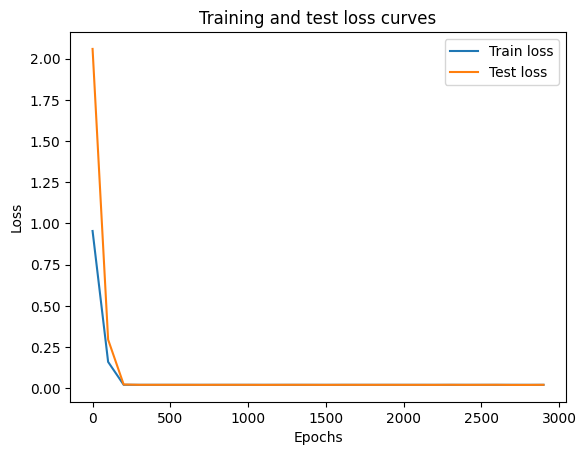

In [21]:
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

***Make predictions with new model***

In [25]:
with torch.inference_mode(): # inference_mode, tured off the gradient traking
    y_preds = model_linear_v2(X_test)
y_preds.T

tensor([[1.4361, 1.4490, 1.4417, 1.4622, 1.5044, 1.4716, 1.5132, 1.5134, 1.5386,
         1.5607, 1.5562, 1.5713, 1.5714, 1.5875, 1.6356, 1.6426, 1.6295, 1.6636,
         1.6758, 1.6791]])

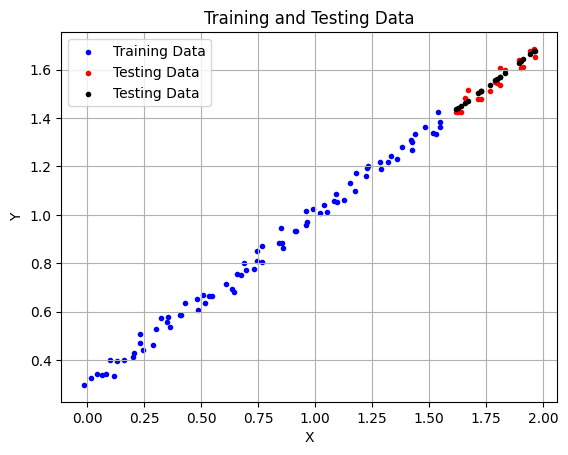

In [26]:
plt.scatter(X_train, y_train, color='blue', label='Training Data', marker=".")
plt.scatter(X_test, y_test, color='red', label='Testing Data', marker=".")
plt.scatter(X_test, y_preds, color='black', label='Testing Data', marker=".")
plt.title('Training and Testing Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()